## **15. 특징 선택**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# 데이터셋 로딩

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = './data/AirQualityUCI_refined.csv'

df = pd.read_csv(
    input_file,
    index_col=[0],
    parse_dates=[0],
    date_parser=parser,
    dtype='float32'
)
df

C:\Users\himoo\AppData\Local\Temp\ipykernel_9792\950496960.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.900002,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.700001,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.000000,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.000000,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.599998,0.7888,6.5
...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.0,1101.0,472.0,539.0,190.0,1374.0,1729.0,29.299999,0.7568,13.5
2005-04-04 11:00:00,2.4,1163.0,1027.0,353.0,604.0,179.0,1264.0,1269.0,23.700001,0.7119,11.4
2005-04-04 12:00:00,2.4,1142.0,1063.0,293.0,603.0,175.0,1241.0,1092.0,18.299999,0.6406,12.4


In [ ]:
# # Visualization setup
# %matplotlib
# %config InlineBackend.figure_format = 'svg'

# from matplotlib import pyplot as plt
# plt.rcParams['figure.figsize'] = [10, 5]
# plt.ion() # enable the interactive mode

# import seaborn as sns
# sns.set()  # set plot styles

In [4]:
# 전체 변수에 대한 결측치 처리 (선형 보간)
df.interpolate(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float32
 1   PT08.S1(CO)    9357 non-null   float32
 2   PT08.S2(NMHC)  9357 non-null   float32
 3   NOx(GT)        9357 non-null   float32
 4   PT08.S3(NOx)   9357 non-null   float32
 5   NO2(GT)        9357 non-null   float32
 6   PT08.S4(NO2)   9357 non-null   float32
 7   PT08.S5(O3)    9357 non-null   float32
 8   RH             9357 non-null   float32
 9   AH             9357 non-null   float32
 10  C6H6(GT)       9357 non-null   float32
dtypes: float32(11)
memory usage: 475.2 KB


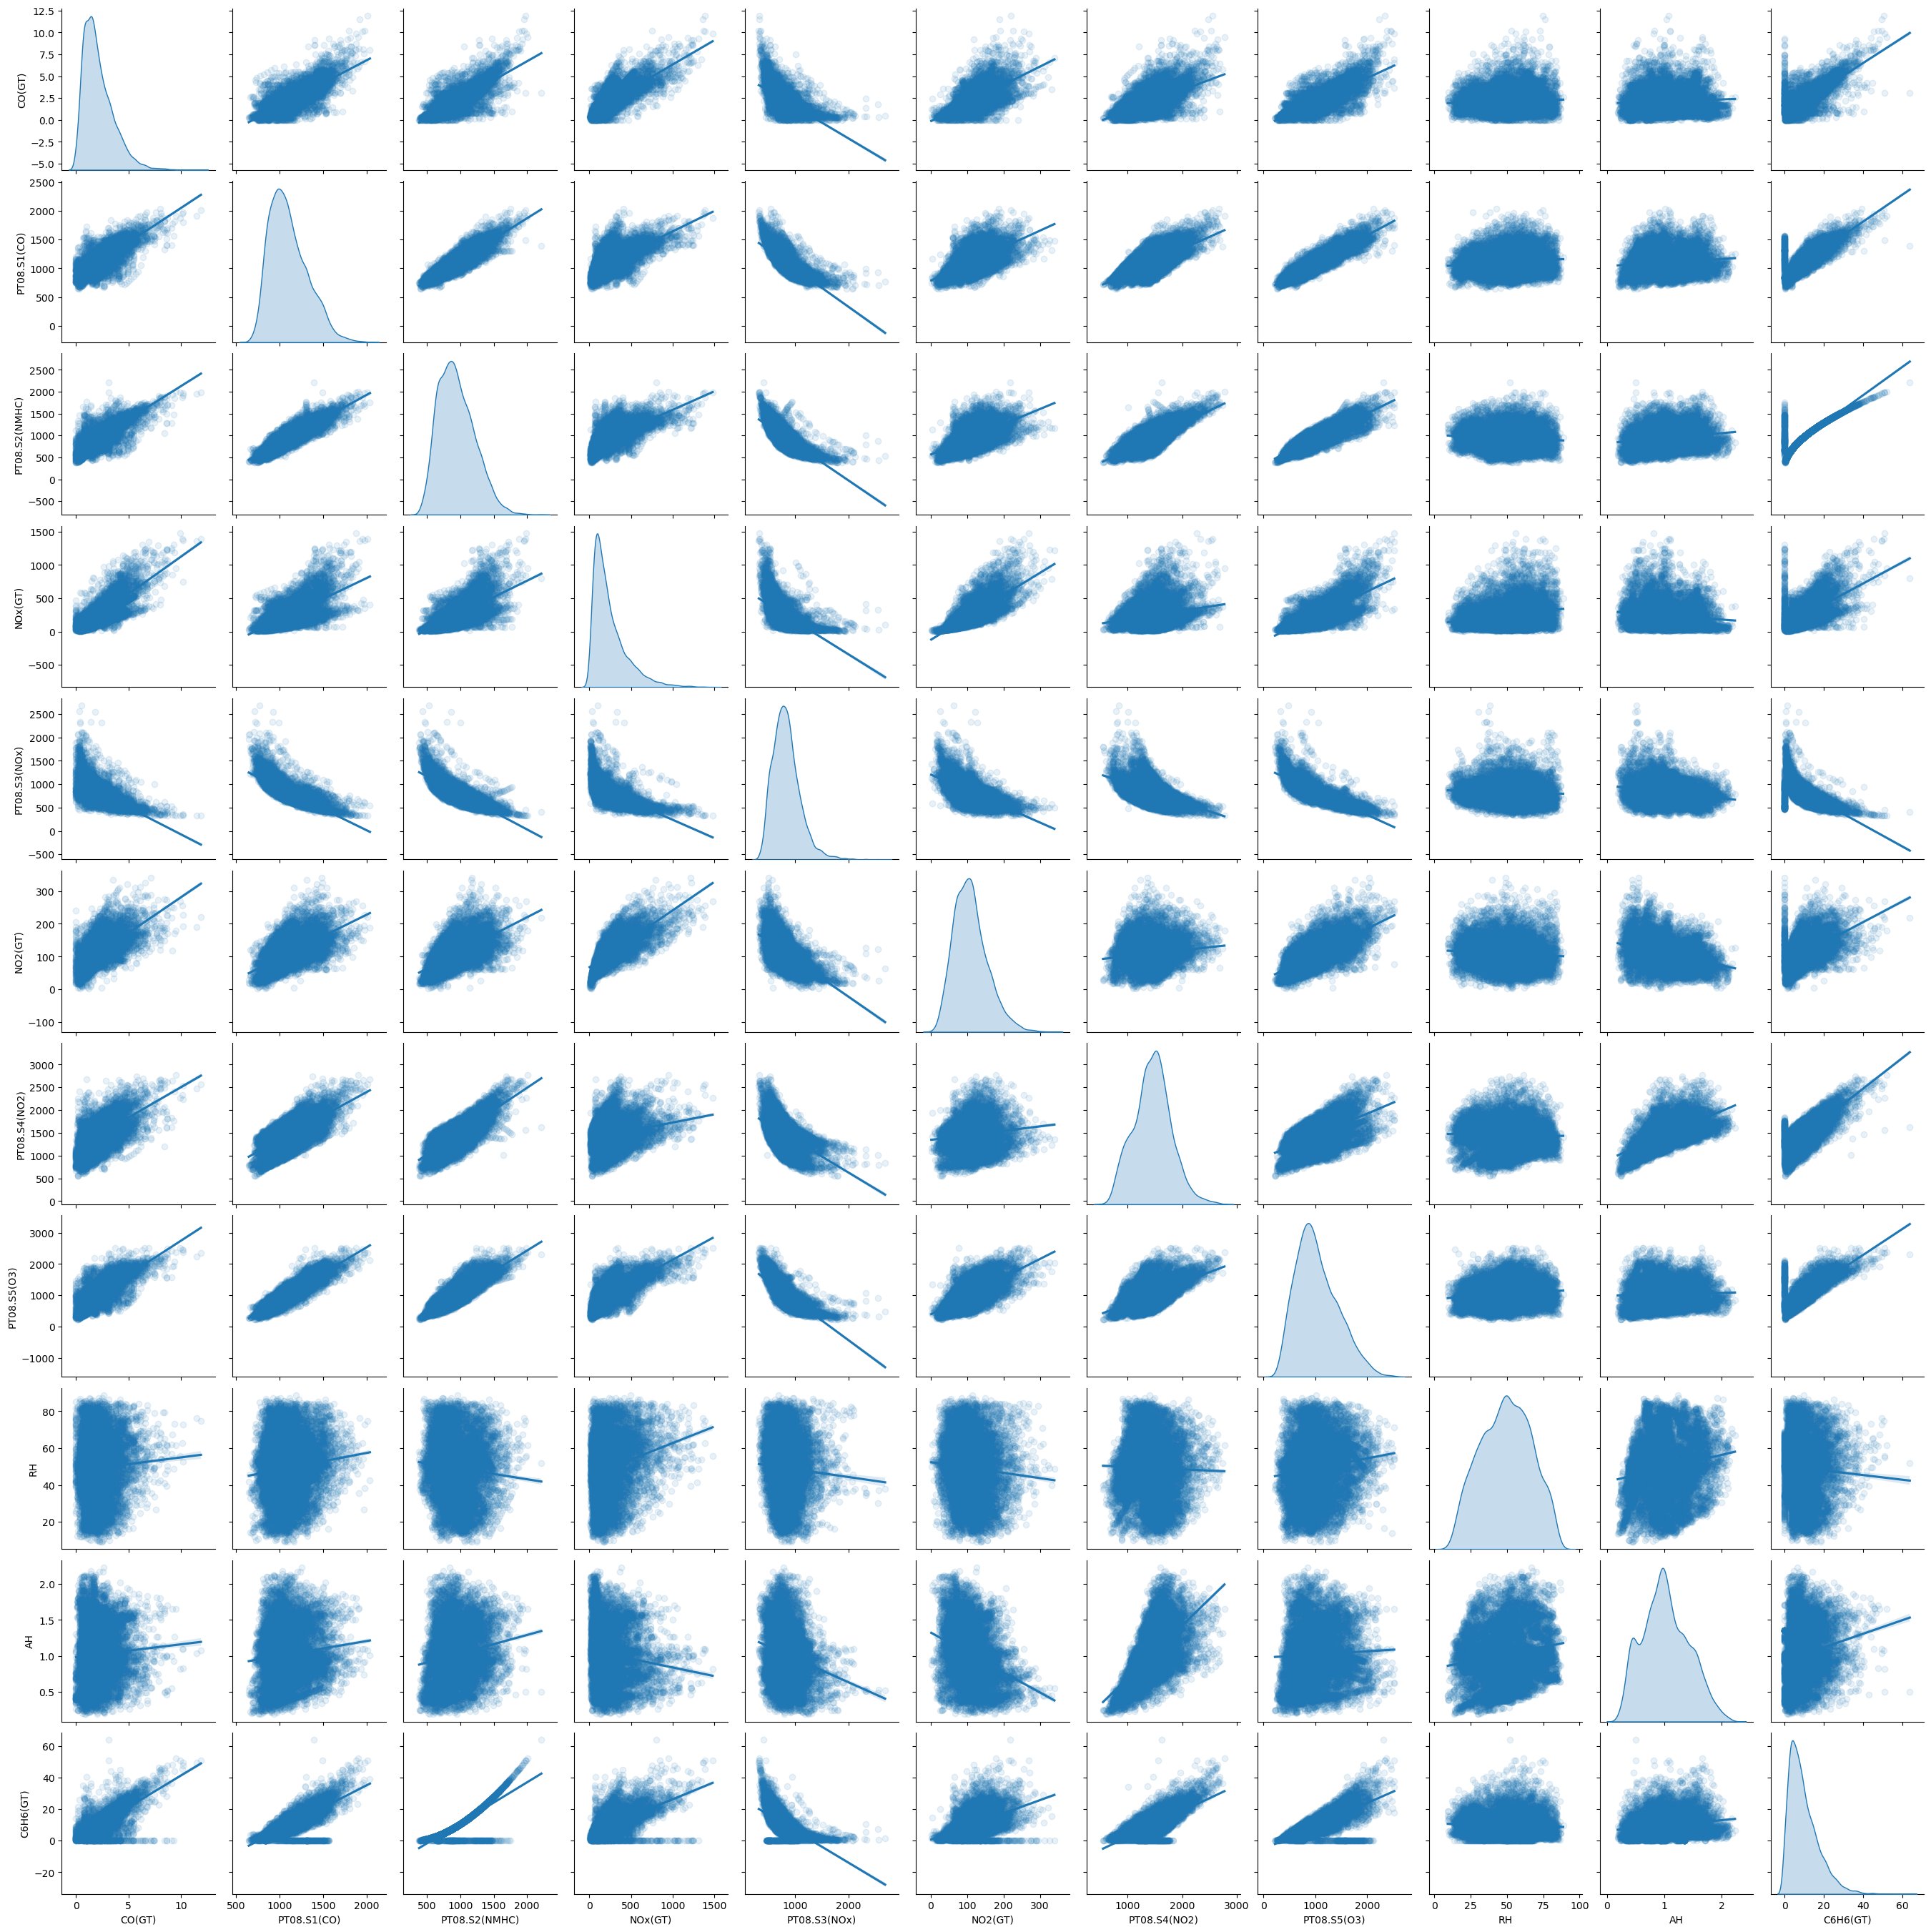

In [5]:
# 상관행렬 시각화
sns.pairplot(
    df, 
    kind='reg', 
    diag_kind='kde', 
    plot_kws={'scatter_kws': {'alpha': 0.1}}
)

In [6]:
# 상관계수 측정
df.corr()

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
CO(GT),1.000000,0.793021,0.807142,0.789544,-0.647024,0.673540,0.558919,0.773442,0.061133,0.063548,0.761713
PT08.S1(CO),0.793021,1.000000,0.892045,0.667099,-0.777083,0.617714,0.667361,0.901731,0.115498,0.112241,0.813633
PT08.S2(NMHC),0.807142,0.892045,1.000000,0.646925,-0.793180,0.601650,0.765290,0.875130,-0.089798,0.170344,0.911915
NOx(GT),0.789544,0.667099,0.646925,1.000000,-0.626814,0.763038,0.214655,0.735982,0.212168,-0.122630,0.587481
PT08.S3(NOx),-0.647024,-0.777083,-0.793180,-0.626814,1.000000,-0.622142,-0.528604,-0.798375,-0.062422,-0.212475,-0.685988
NO2(GT),0.673540,0.617714,0.601650,0.763038,-0.622142,1.000000,0.134203,0.679754,-0.077801,-0.322243,0.514042
PT08.S4(NO2),0.558919,0.667361,0.765290,0.214655,-0.528604,0.134203,1.000000,0.569545,-0.026601,0.629481,0.742489
PT08.S5(O3),0.773442,0.901731,0.875130,0.735982,-0.798375,0.679754,0.569545,1.000000,0.127247,0.044611,0.777093
RH,0.061133,0.115498,-0.089798,0.212168,-0.062422,-0.077801,-0.026601,0.127247,1.000000,0.170529,-0.055630
AH,0.063548,0.112241,0.170344,-0.122630,-0.212475,-0.322243,0.629481,0.044611,0.170529,1.000000,0.178522


**모델 학습 및 특징 중요도 출력**

In [8]:
df.head()

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.900002,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.700001,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.000000,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.000000,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.599998,0.7888,6.5


In [7]:
# 학습 데이터셋 준비
X = df.iloc[:, 1:] # 훈련 데이터
y = df.iloc[:, 0]  # 레이블 데이터
print(X.shape, y.shape)

(9357, 10) (9357,)


In [9]:
from sklearn.ensemble import RandomForestRegressor  # 랜덤 포레스트 회귀 모형

# 모델 학습
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [10]:
# 특징 중요도 출력
print(model.feature_importances_)

[0.04610192 0.53591321 0.2117113  0.01867813 0.0394526  0.01895244
 0.01758915 0.01451919 0.02481952 0.07226254]


In [11]:
feat_importances

NameError: name 'feat_importances' is not defined

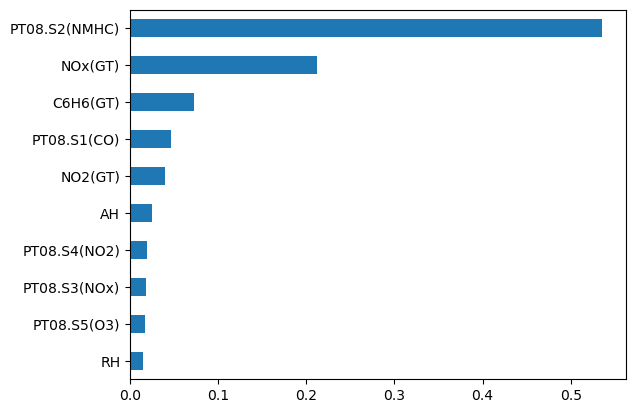

In [12]:
# 특징 중요도 시각화
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh')
plt.show()